# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [4]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [5]:
# Importing the file porter_data_1.csv

porter=pd.read_csv('porter_data_1.csv')

In [6]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105849 entries, 0 to 105848
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 105849 non-null  float64
 1   created_at                105849 non-null  object 
 2   actual_delivery_time      105848 non-null  object 
 3   store_primary_category    105848 non-null  float64
 4   order_protocol            105848 non-null  float64
 5   total_items               105848 non-null  float64
 6   subtotal                  105848 non-null  float64
 7   num_distinct_items        105848 non-null  float64
 8   min_item_price            105848 non-null  float64
 9   max_item_price            105848 non-null  float64
 10  total_onshift_dashers     105848 non-null  float64
 11  total_busy_dashers        105848 non-null  float64
 12  total_outstanding_orders  105848 non-null  float64
 13  distance                  105848 non-null  f

In [7]:
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                     4.0             1.0          4.0    3441.0   
1                    46.0             2.0          1.0    1900.0   
2                    36.0             3.0          4.0    4771.0   
3                    38.0             1.0          1.0    1525.0   
4                    38.0             1.0          2.0    3620.0   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                 4.0           557.0          1239.0                   33.0   
1                 1.0          1400.0          1400.0                    1.0   
2                 3.0           820.0          1604.0                    8.0   
3                 1.0          1525.0          1525.0                    5.0   
4                 2.0          1425.0          2195.0                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [8]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter['created_at'] = pd.to_datetime(porter['created_at'], errors='coerce')
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'], errors='coerce')

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [9]:
catCol = ['market_id','store_primary_category','order_protocol']
for col in catCol:
    porter[col] = porter[col].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [10]:
# Calculate time taken in minutes
porter['Time_taken']=(porter['actual_delivery_time']-porter['created_at']).dt.total_seconds()/60

# Step 3: Optionally, convert the time difference to minutes, hours, etc.


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [17]:
# Extract the hour and day of week from the 'created_at' timestamp
porter['Order_hours']=(porter['created_at'].dt.hour).astype(int)


# Create a categorical feature 'isWeekend'
porter['Orderday_of_week']=porter['created_at'].dt.weekday
porter['isWeekend']=porter['Orderday_of_week'].apply(lambda x:1 if x<5 else 0)
porter['isWeekend']=porter['isWeekend'].astype(int)


KeyError: 'created_at'

In [15]:
# Drop unnecessary columns
porter.drop(columns=['created_at','actual_delivery_time'],axis=1,inplace=True)

KeyError: "['created_at', 'actual_delivery_time'] not found in axis"

In [16]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105849 entries, 0 to 105848
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 105849 non-null  category
 1   store_primary_category    105848 non-null  category
 2   order_protocol            105848 non-null  category
 3   total_items               105848 non-null  float64 
 4   subtotal                  105848 non-null  float64 
 5   num_distinct_items        105848 non-null  float64 
 6   min_item_price            105848 non-null  float64 
 7   max_item_price            105848 non-null  float64 
 8   total_onshift_dashers     105848 non-null  float64 
 9   total_busy_dashers        105848 non-null  float64 
 10  total_outstanding_orders  105848 non-null  float64 
 11  distance                  105848 non-null  float64 
 12  Time_taken                105848 non-null  float64 
dtypes: category(3), float64(10)
m

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [18]:
# Define target variable (y) and features (X)
from sklearn.model_selection import train_test_split
# This is not the right place to create X and y. It should come after perfrming EDA and jut before model creation.
# I have created these variable down

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [19]:
# Split data into training and testing sets

# Analyis:-
#I am not passing X and y to the train_test_split , becuase EDA should happen before deriving X and y.
#A the bottom we have to see correlation of target variable with other independent variable.
# X and y make sense just before model building

df_train,df_test = train_test_split(porter, test_size=0.2, random_state=42)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84679 entries, 65024 to 15795
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 84679 non-null  category
 1   store_primary_category    84679 non-null  category
 2   order_protocol            84679 non-null  category
 3   total_items               84679 non-null  float64 
 4   subtotal                  84679 non-null  float64 
 5   num_distinct_items        84679 non-null  float64 
 6   min_item_price            84679 non-null  float64 
 7   max_item_price            84679 non-null  float64 
 8   total_onshift_dashers     84679 non-null  float64 
 9   total_busy_dashers        84679 non-null  float64 
 10  total_outstanding_orders  84679 non-null  float64 
 11  distance                  84679 non-null  float64 
 12  Time_taken                84679 non-null  float64 
dtypes: category(3), float64(10)
memory usage: 7.4 M

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [21]:
# Define numerical and categorical columns for easy EDA and data manipulation

numCols = ['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','Time_taken',
           'total_busy_dashers','total_outstanding_orders','distance']
categoryCols = ['market_id','store_primary_category','order_protocol','Order_hours','isWeekend','Orderday_of_week']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [22]:
# Plot distributions for all numerical columns
plt.figure(figsize=(18,20))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.histplot(df_train[col],bins=10,palette='#1a80bb')
    plt.title(f'Distributon of {col}')
    plt.tight_layout()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84679 entries, 65024 to 15795
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 84679 non-null  category
 1   store_primary_category    84679 non-null  category
 2   order_protocol            84679 non-null  category
 3   total_items               84679 non-null  float64 
 4   subtotal                  84679 non-null  float64 
 5   num_distinct_items        84679 non-null  float64 
 6   min_item_price            84679 non-null  float64 
 7   max_item_price            84679 non-null  float64 
 8   total_onshift_dashers     84679 non-null  float64 
 9   total_busy_dashers        84679 non-null  float64 
 10  total_outstanding_orders  84679 non-null  float64 
 11  distance                  84679 non-null  float64 
 12  Time_taken                84679 non-null  float64 
dtypes: category(3), float64(10)
memory usage: 7.4 M

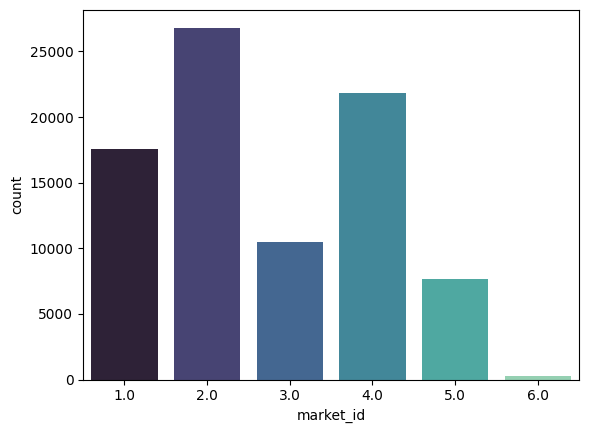

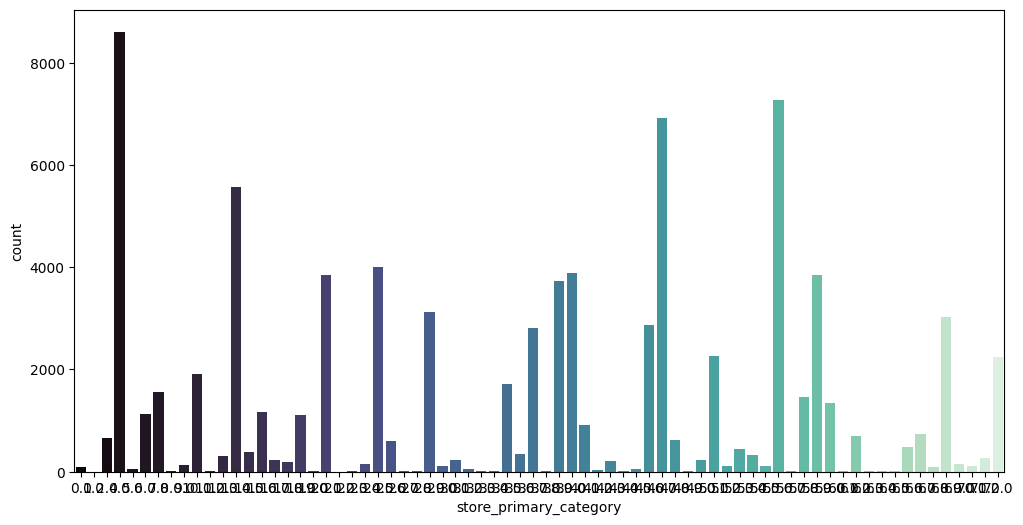

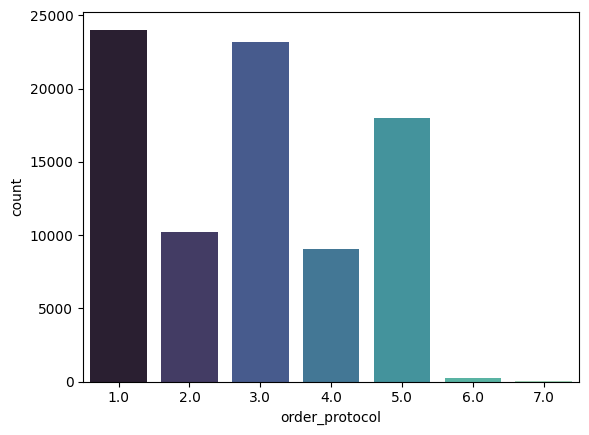

KeyError: 'Order_hours'

In [24]:
# Distribution of categorical columns

for col in categoryCols:
    if col == 'store_primary_category':
        plt.figure(figsize=(12,6))
    sns.countplot(x=df_train[col],palette='mako')
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

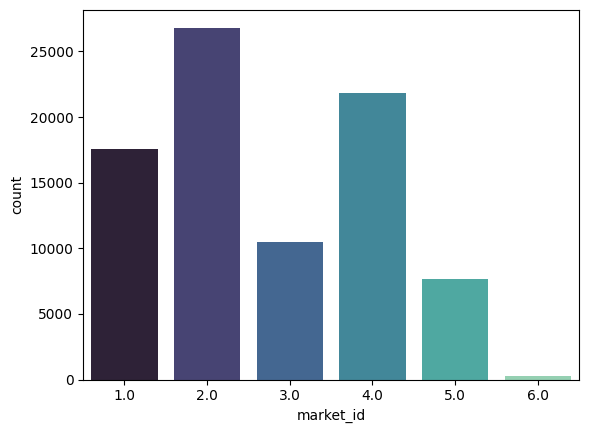

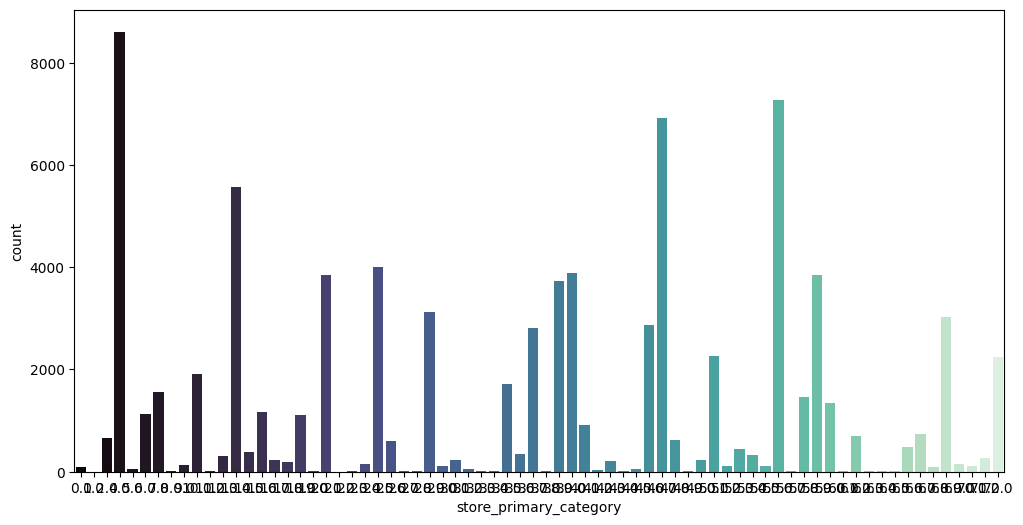

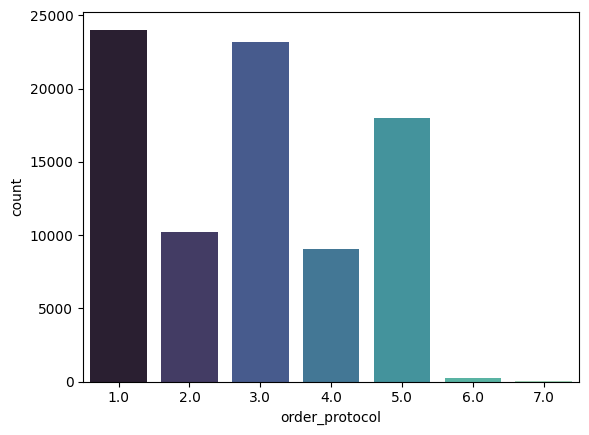

KeyError: 'Order_hours'

In [25]:
# Distribution of time_taken
for col in categoryCols:
    if col == 'store_primary_category':
        plt.figure(figsize=(12,6))
    sns.countplot(x=df_train[col],palette='mako')
    plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

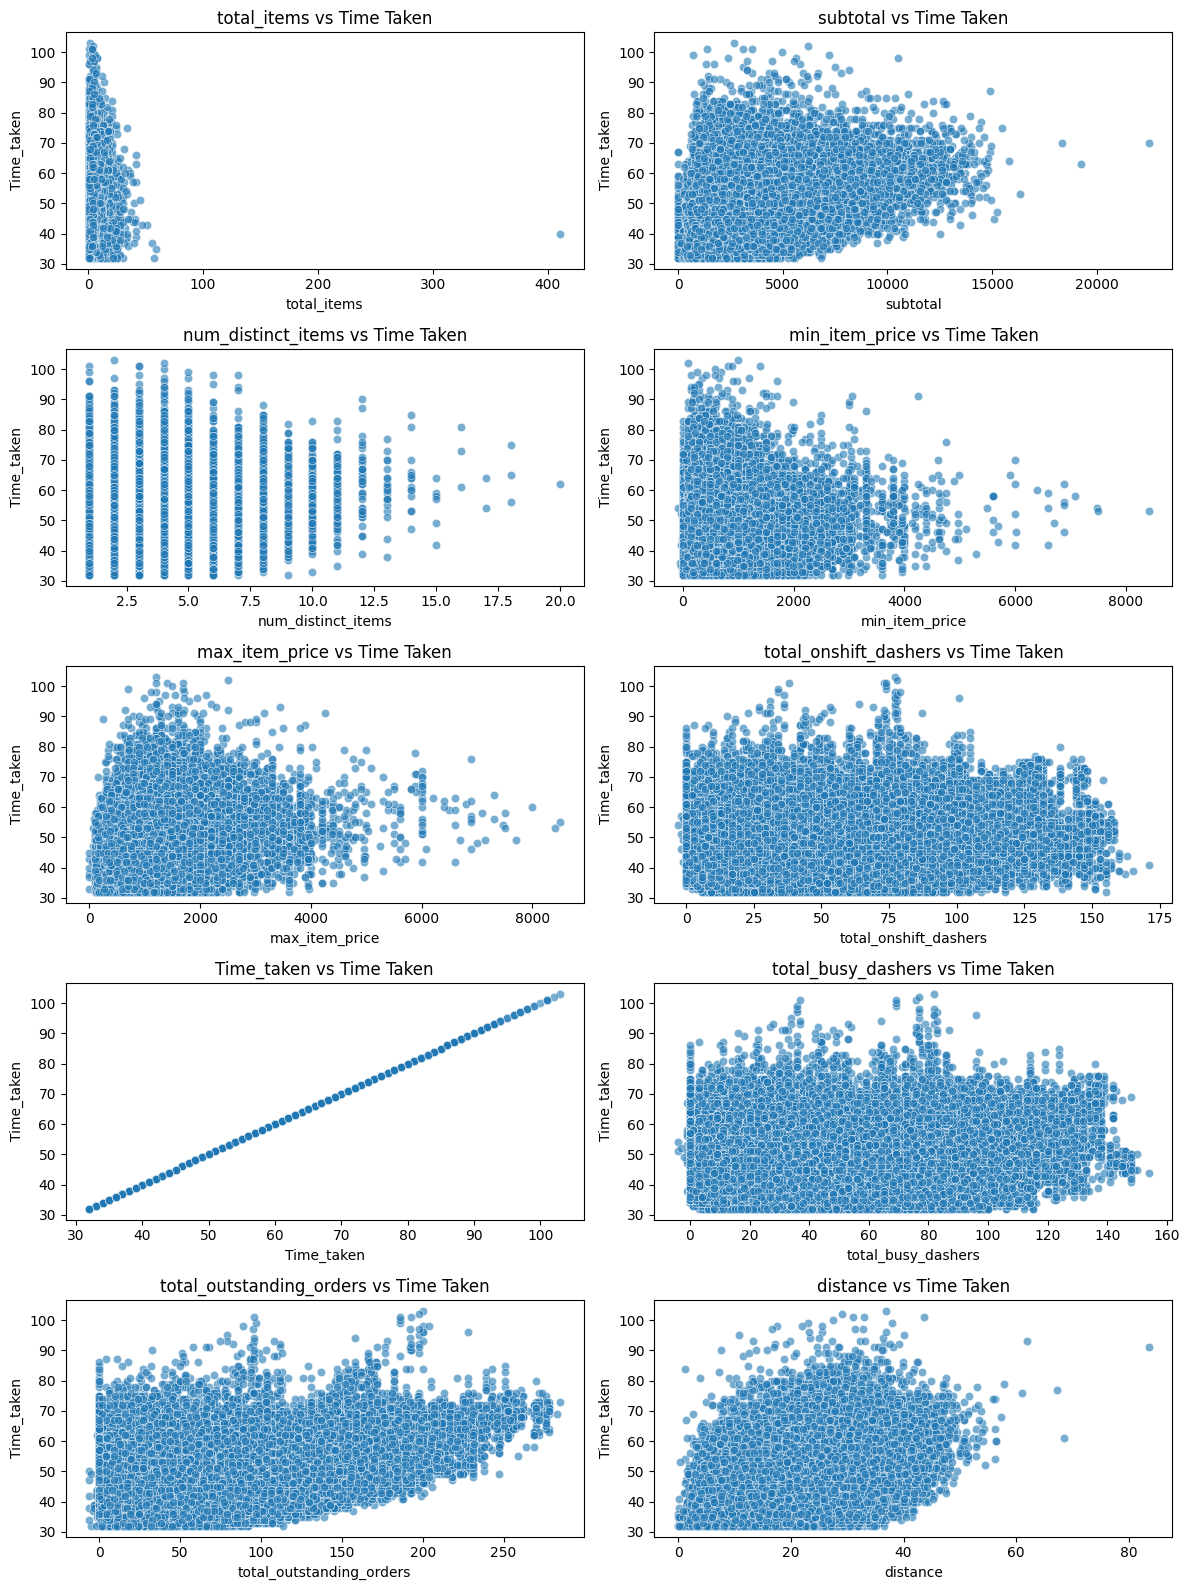

In [26]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(12,16))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_train, x=col ,y='Time_taken',alpha=0.6)
    plt.title(f'{col} vs Time Taken')
    plt.tight_layout()
plt.show()

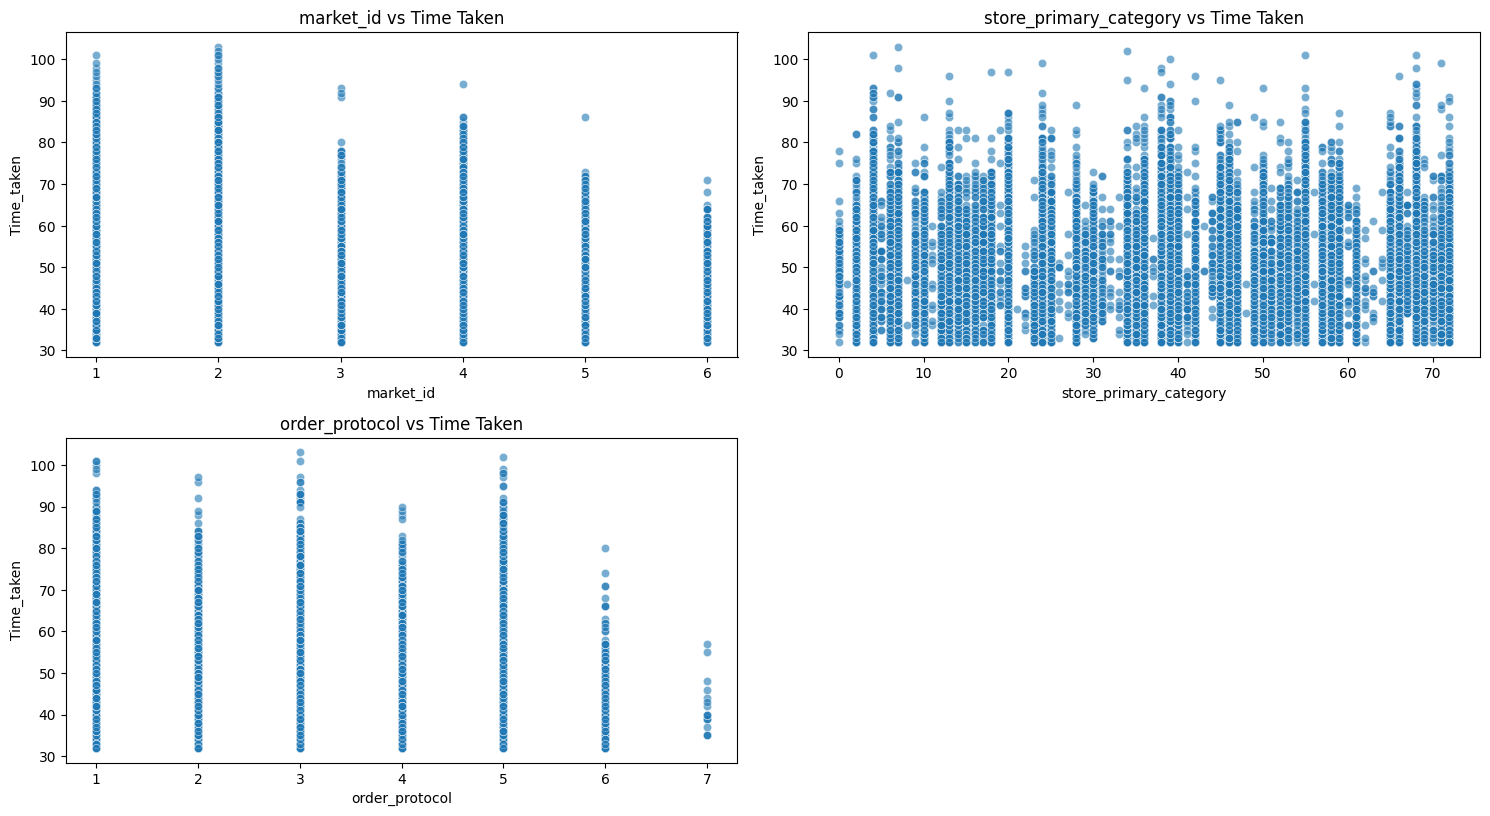

In [30]:
plt.figure(figsize=(12,16))
for i,col in enumerate(categoryCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_train, x=col ,y='Time_taken',alpha=0.6)
    plt.title(f'{col} vs Time Taken')
    plt.tight_layout()
plt.show()

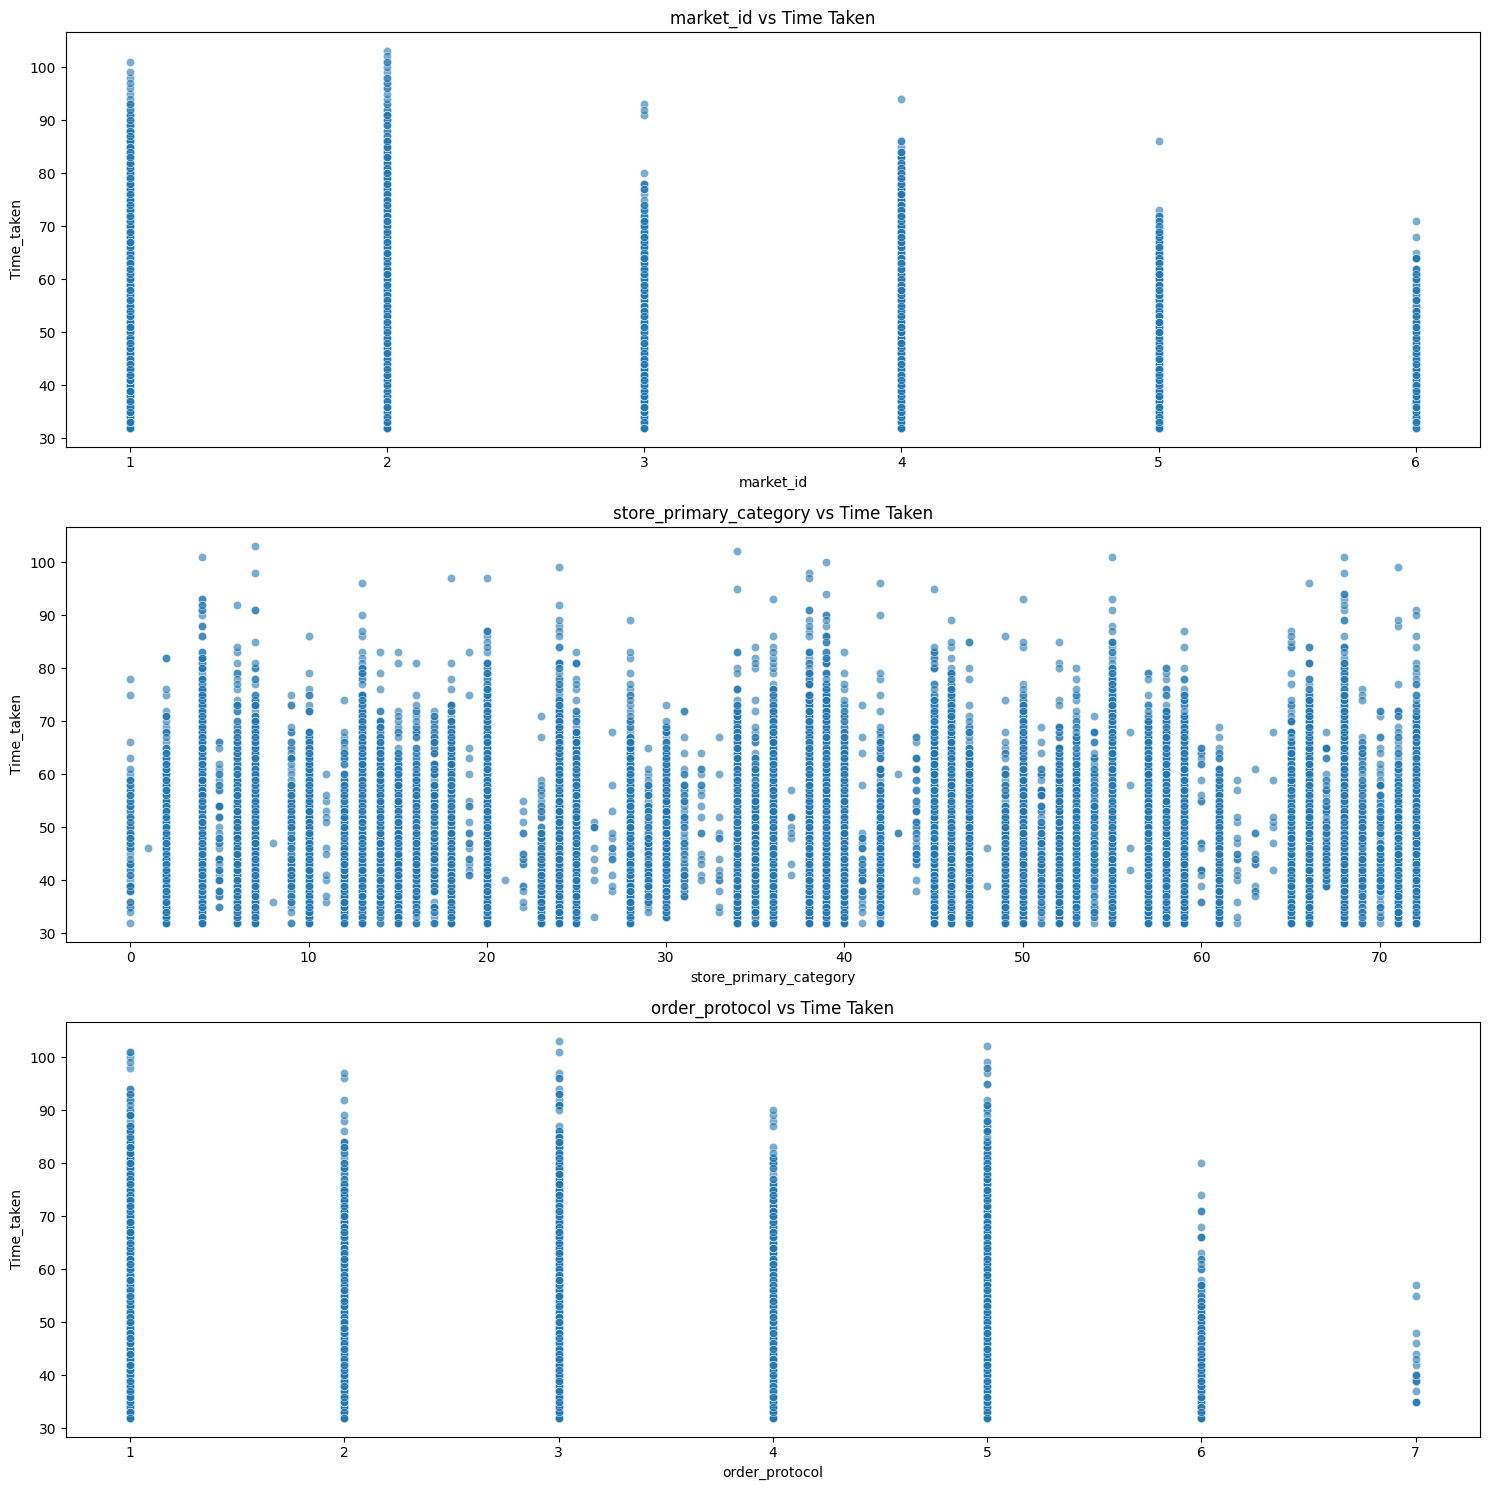

In [32]:
# Show the distribution of time_taken for different hours


valid_cols = [col for col in categoryCols if col in df_train.columns]

if not valid_cols:
    print("No valid columns found in df_train. Check your categoryCols list.")
else:
    plt.figure(figsize=(15, 5 * len(valid_cols)))  # Dynamic height

    for i, col in enumerate(valid_cols, 1):
        plt.subplot(len(valid_cols), 1, i)
        sns.scatterplot(data=df_train, x=col, y='Time_taken', alpha=0.6)
        plt.title(f'{col} vs Time Taken')

    plt.tight_layout()
    plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

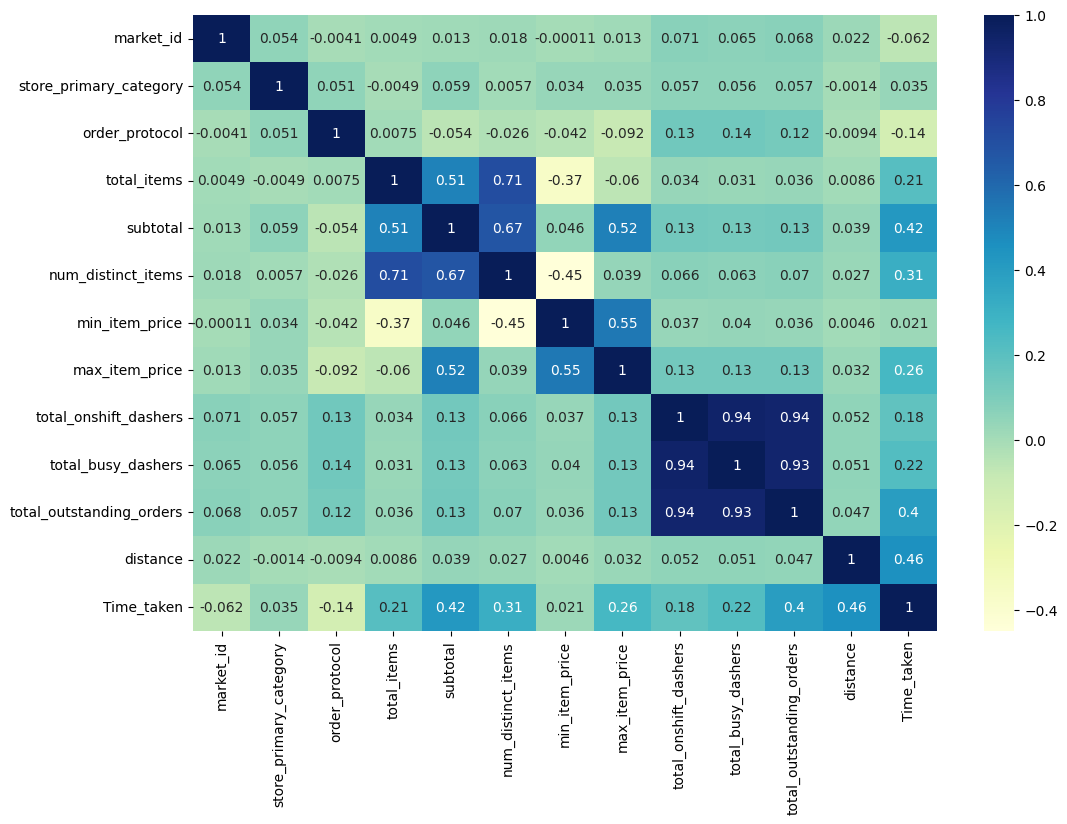

In [33]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [34]:
# Drop 3-5 weakly correlated columns from training dataset

df_train.corr()['Time_taken'].sort_values(ascending=False)

Time_taken                  1.000000
distance                    0.455148
subtotal                    0.418785
total_outstanding_orders    0.397869
num_distinct_items          0.314022
max_item_price              0.259985
total_busy_dashers          0.221002
total_items                 0.209239
total_onshift_dashers       0.182564
store_primary_category      0.035463
min_item_price              0.021310
market_id                  -0.062492
order_protocol             -0.141621
Name: Time_taken, dtype: float64

In [35]:
WeakCorrCol= ['store_primary_category','min_item_price','Orderday_of_week','Order_hours']
df_train.drop(WeakCorrCol,axis=1,inplace=True)

numCols=[c for c in numCols if c not in WeakCorrCol]
categoryCols=[c for c in categoryCols if c not in WeakCorrCol]


KeyError: "['Orderday_of_week', 'Order_hours'] not found in axis"

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

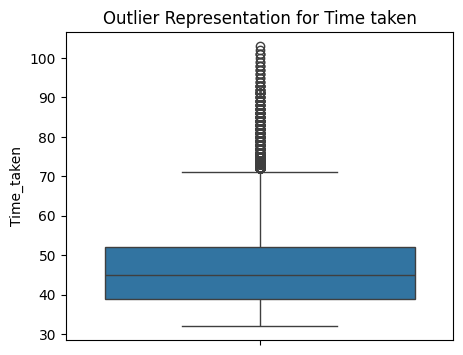

In [36]:
# Boxplot for time_taken

plt.figure(figsize=(5,4))
sns.boxplot(y=df_train['Time_taken'])
plt.title('Outlier Representation for Time taken')
plt.show()

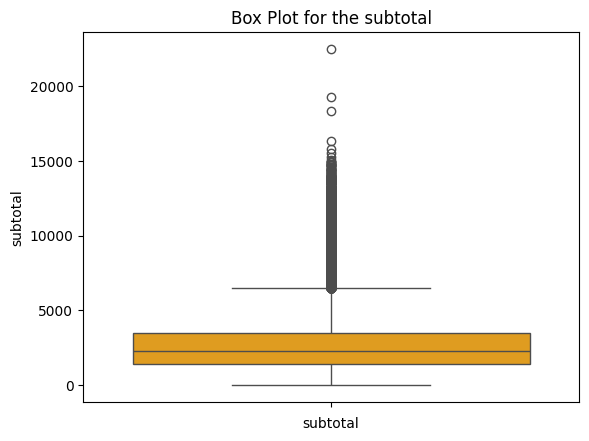

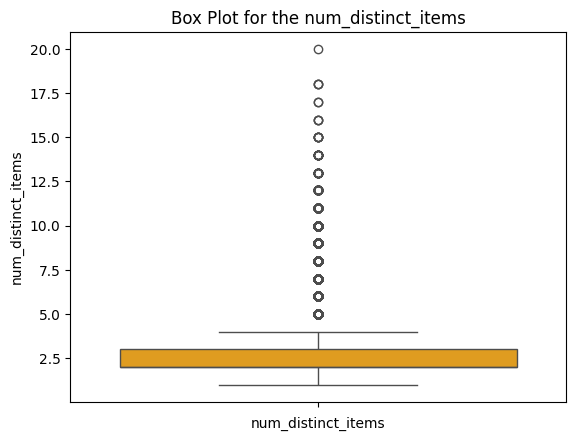

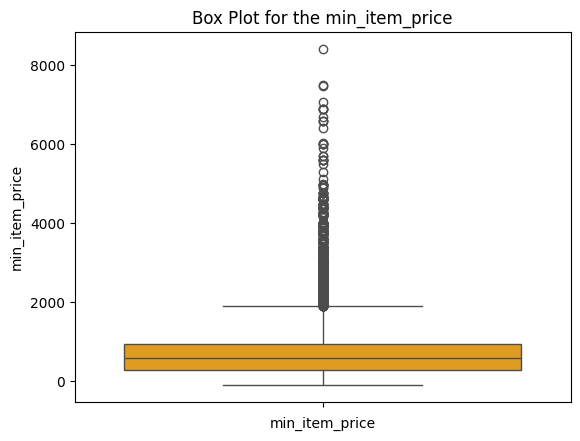

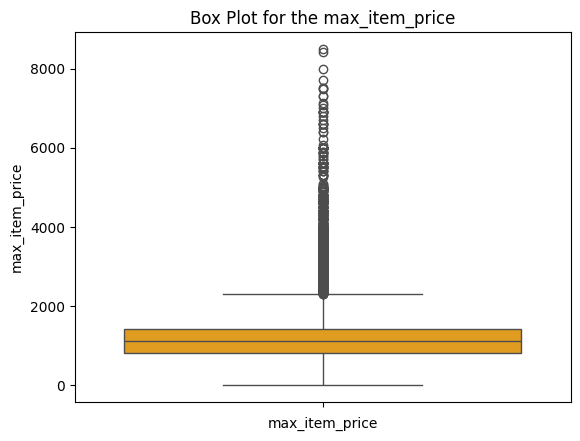

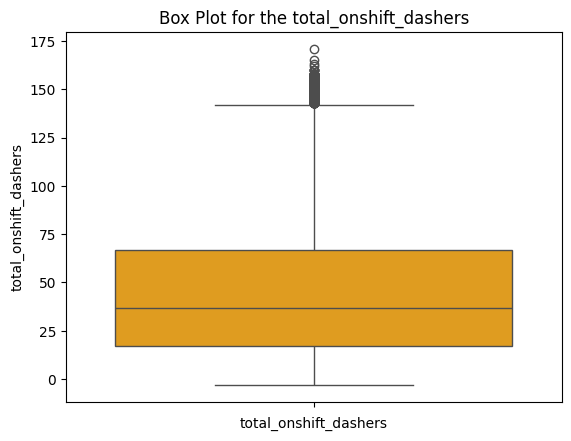

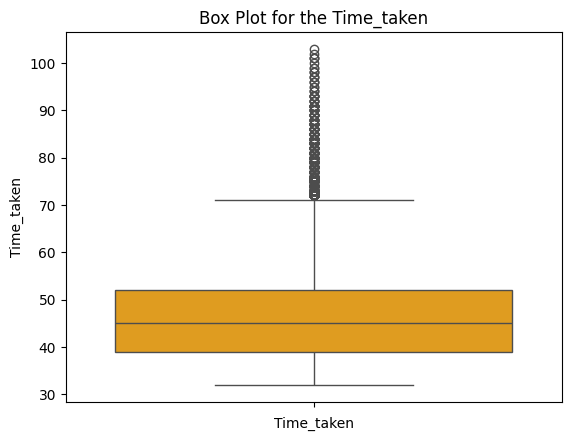

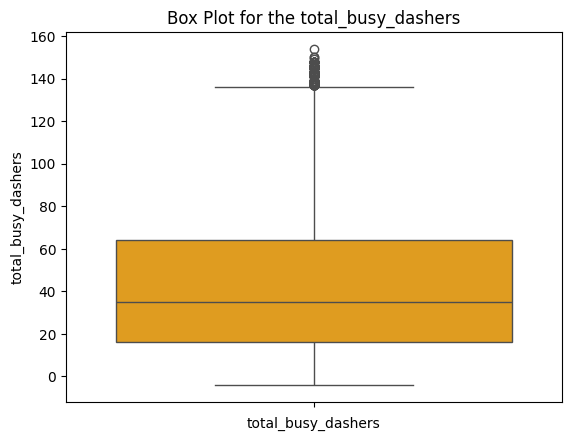

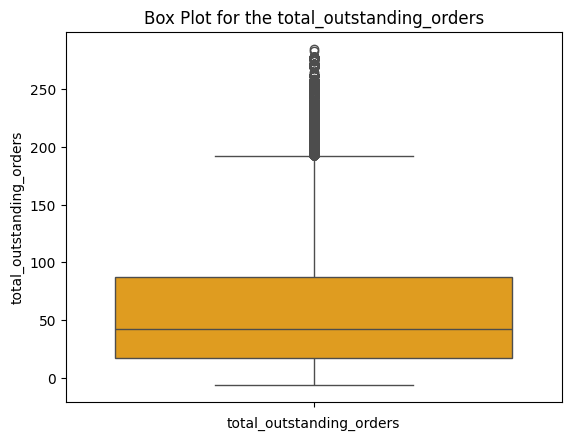

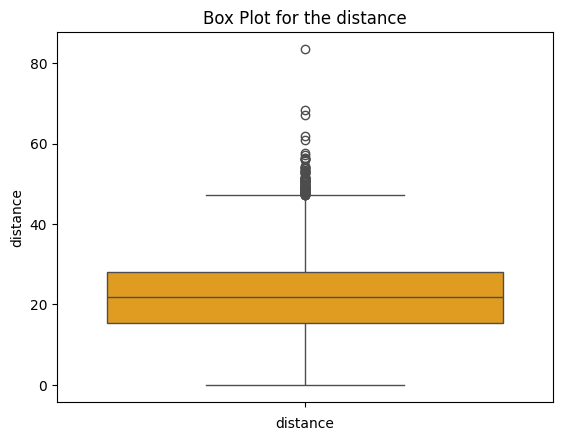

In [37]:
for col in numCols:
    sns.boxplot(data=df_train, y=df_train[col],color='orange')
    plt.title(f"Box Plot for the {col}")
    plt.xlabel(col)
    plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [38]:
# Handle outliers

def remove_outliers(df,columns,multiplier=1.5):
    df_clean=df.copy()
    for col in columns:
        Q1=df_clean[col].quantile(0.25)
        Q3=df_clean[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-multiplier*IQR
        upper_bound=Q3+multiplier*IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

def handle_InvalidData(df):
    #Observation:
    #1.we have certain row with subtotal as 0 and total_items > 0 , so it looks like invalid data
    df = df[df['subtotal'] > 0]
    #2.we have certain row with max_item_price less than 0 , so it looks like invalid data
    df = df[df['max_item_price'] > 0]
    #3.we have certain row with total_onshift_dashers less than 0 , so it looks like invalid data
    df = df[df['total_onshift_dashers'] >= 0]
    #4.we have certain row with total_busy_dashers less than 0 , so it looks like invalid data
    df = df[df['total_busy_dashers'] >= 0]
    #5.we have certain row with total_outstanding_orders less than 0 , so it looks like invalid data
    df = df[df['total_outstanding_orders'] >= 0]
    #6.we have certain row with distance less than 0 , so it looks like invalid data
    df = df[df['distance'] > 0]
    #7.we have certain row with total_onshift_dashers less than total_busy_dashers , so it looks like invalid data
    df = df[df['total_onshift_dashers'] >=  df['total_busy_dashers']]
    return df

In [39]:
df_train=handle_InvalidData(df_train)


outlier_col=['distance','subtotal','total_outstanding_orders','max_item_price','total_items','total_busy_dashers','total_onshift_dashers','Time_taken']
df_train=remove_outliers(df_train,outlier_col,1.5)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [40]:
# Define numerical and categorical columns for easy EDA and data manipulation

numCols=['total_items','subtotal', 'num_distinct_items', 'max_item_price',
         'total_onshift_dashers', 'Time_taken', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

categoryCols = ['market_id', 'order_protocol', 'isWeekend']

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

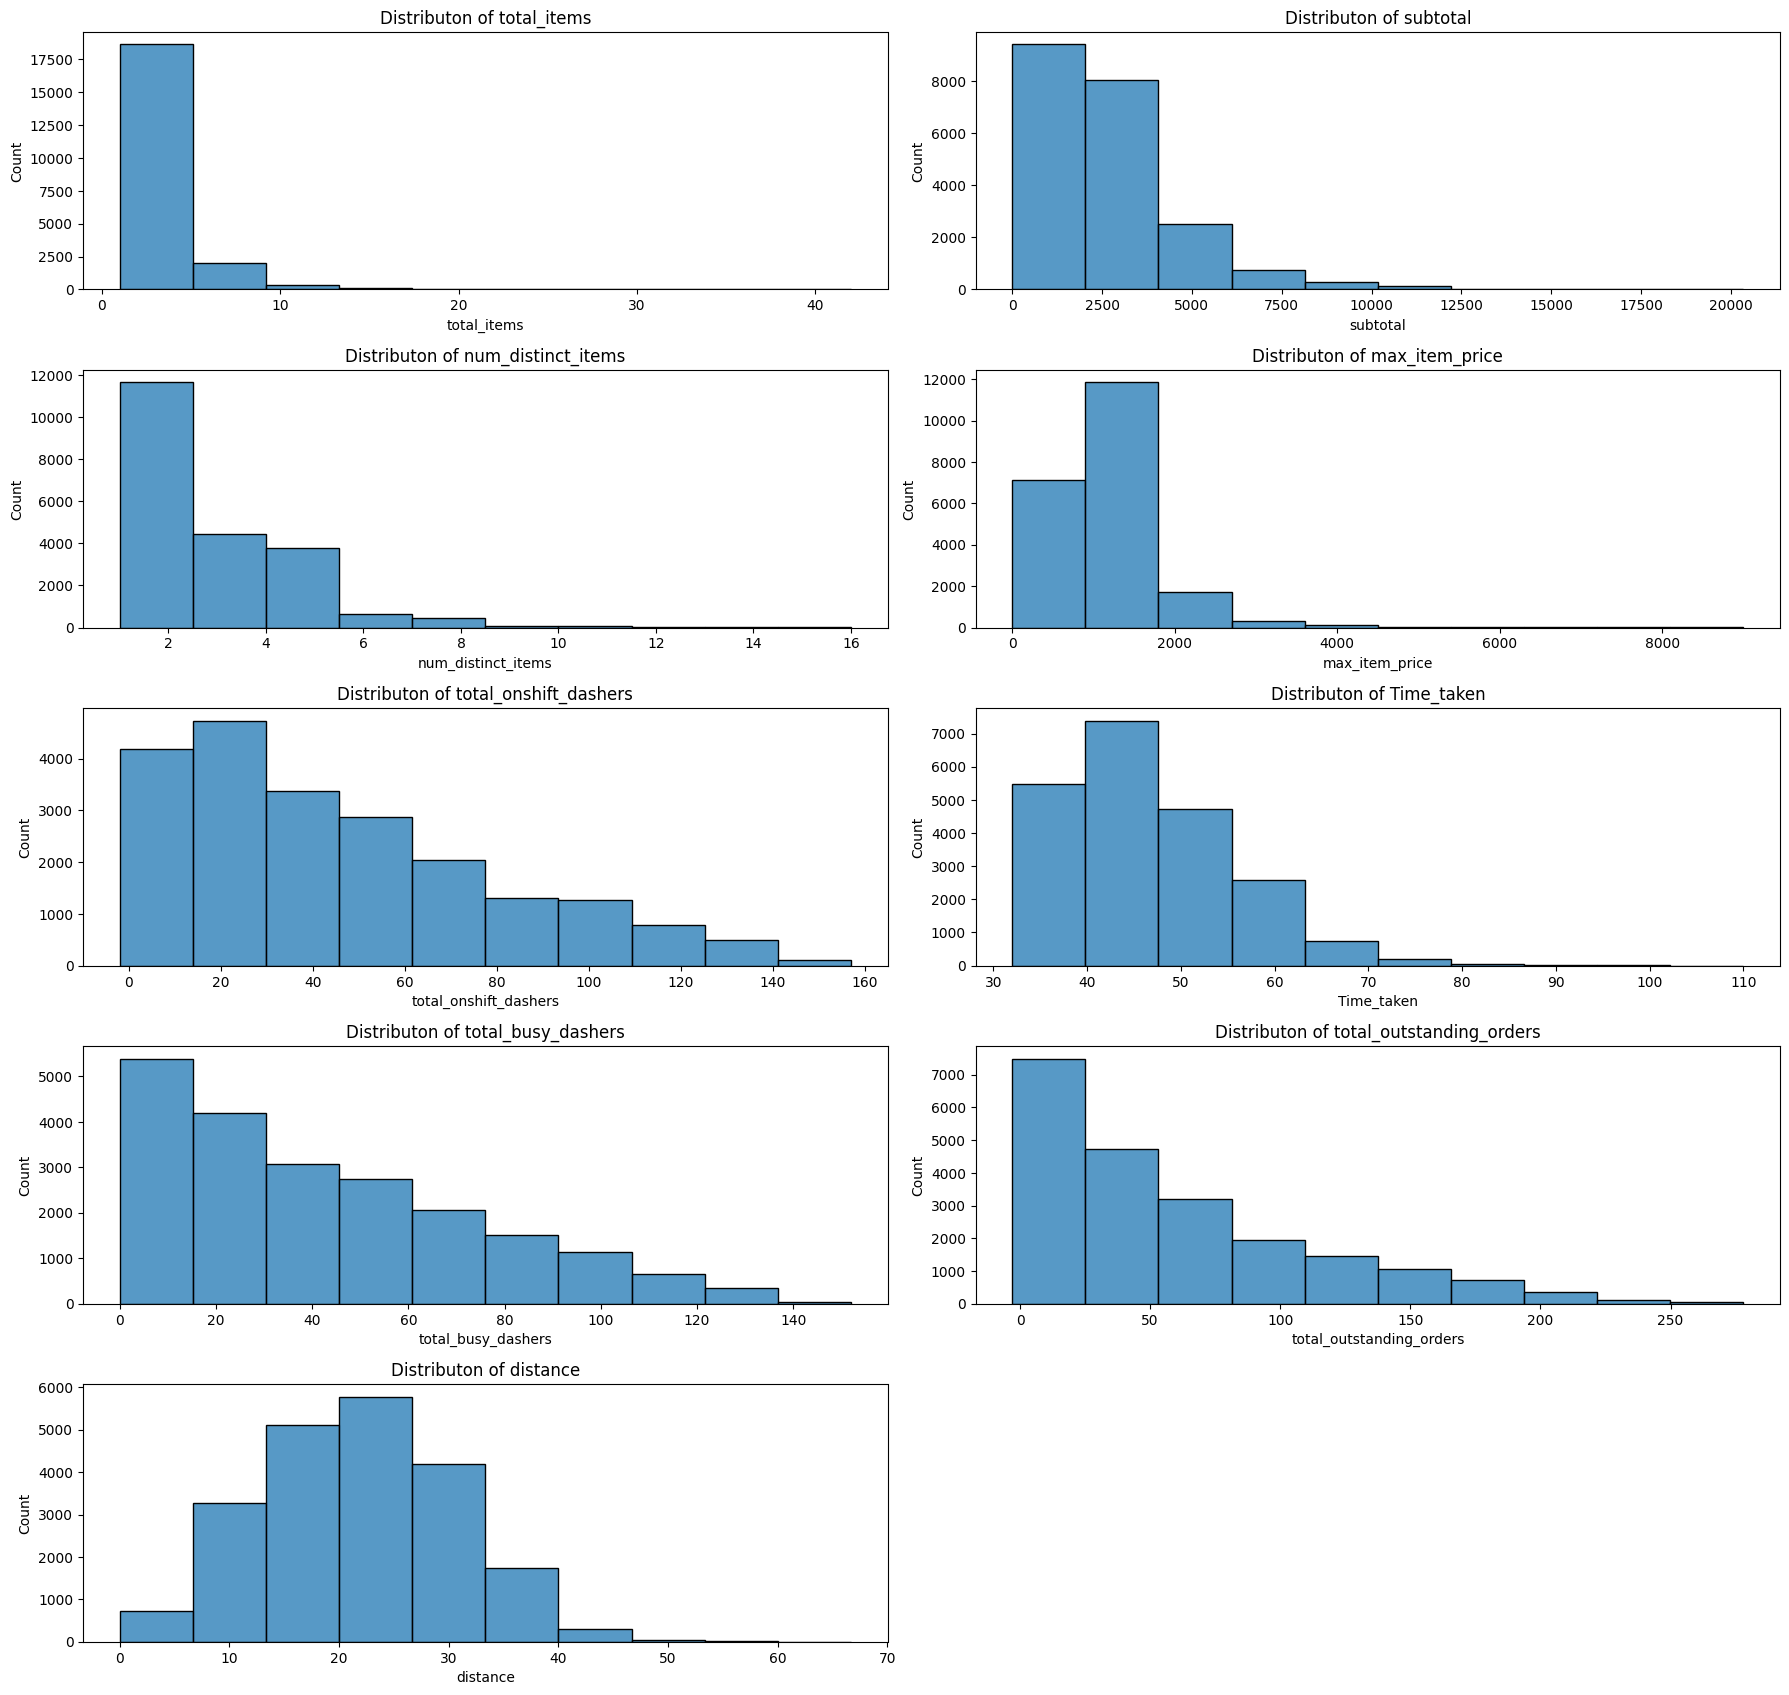

In [41]:
# Plot distributions for all numerical columns

plt.figure(figsize=(18,20))

for i,col in enumerate(numCols,1):
    plt.subplot(6,2,i)
    sns.histplot(df_test[col],bins=10,palette='#1a80bb')
    plt.title(f'Distributon of {col}')
    plt.tight_layout()

##### **4.1.2**
Check the distribution of categorical features

In [42]:
# Distribution of categorical columns

for col in categoryCols:
    sns.countplot(x=df_test[col],palette='mako')
    plt.show()

KeyError: 'isWeekend'

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

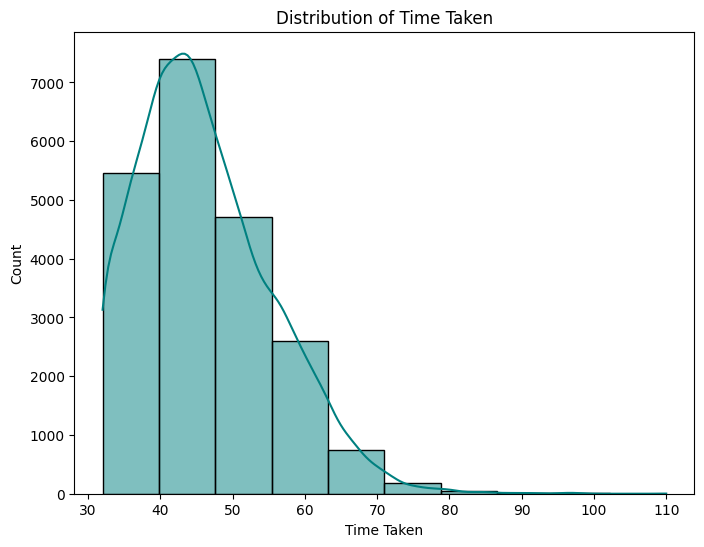

In [43]:
# Distribution of time_taken

plt.figure(figsize=(8,6))
sns.histplot(df_test['Time_taken'],kde=True, bins=10,color="teal")
plt.title("Distribution of Time Taken")
plt.xlabel("Time Taken")
plt.ylabel("Count")
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [44]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(12,16))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_test,x =col,y='Time_taken',alpha=0.6)
    plt.title(f"{ col } vs Time Taken")
    plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [45]:
# Drop the weakly correlated columns from training dataset

weakCorrCol = ['store_primary_category','min_item_price','Order_hours','Orderday_of_week']
df_test.drop(weakCorrCol,axis=1,inplace=True)




KeyError: "['Order_hours', 'Orderday_of_week'] not found in axis"

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [46]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [47]:
# Apply scaling to the numerical columns
def addDummies(df, columns):
    df = df.copy()  # optional: prevents modifying original df
    for col in columns:
        dummies = pd.get_dummies(df[col], prefix=col, dtype=int, drop_first=True)
        df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
    return df


In [49]:
df_train =addDummies(df_train,categoryCols)
df_test =addDummies(df_test,categoryCols)

KeyError: 'isWeekend'

In [50]:
df_test

market_id store_primary_category order_protocol  total_items  subtotal  \
99198       3.0                   46.0            1.0          2.0    4100.0   
35801       4.0                    4.0            1.0          1.0    1073.0   
21759       1.0                   13.0            5.0          2.0    1900.0   
30536       1.0                    4.0            1.0          2.0    2000.0   
6411        4.0                   36.0            2.0          4.0    1996.0   
...         ...                    ...            ...          ...       ...   
61179       1.0                   20.0            5.0          5.0    4700.0   
27084       3.0                   68.0            1.0          5.0    6075.0   
25834       2.0                   13.0            1.0          2.0    2129.0   
99343       5.0                   39.0            1.0          3.0    2840.0   
88893       3.0                   20.0            1.0          6.0    4676.0   

       num_distinct_items  min_item_price  max_item_price  \
99198                 2.0          1700.0          2400.0   
35801                 1.0           943.0          1036.0   
21759                 2.0           725.0          1175.0   
30536                 2.0           550.0          1150.0   
6411                  3.0           299.0          1099.0   
...                   ...             ...             ...   
61179                 5.0           800.0          1250.0   
27084                 5.0           695.0          1395.0   
25834                 2.0           700.0          1429.0   
99343                 3.0           750.0          1195.0   
88893                 5.0           694.0          1079.0   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
99198                   26.0                27.0                      23.0   
35801                   49.0                41.0                      56.0   
21759                   34.0                33.0                      52.0   
30536                    4.0                 5.0                       2.0   
6411                    37.0                37.0                      32.0   
...                      ...                 ...                       ...   
61179                    0.0                 0.0                       0.0   
27084                    7.0                 8.0                      12.0   
25834                   37.0                25.0                      32.0   
99343                   18.0                21.0                      21.0   
88893                   27.0                29.0                      30.0   

       distance  Time_taken  
99198     26.72        51.0  
35801     22.68        41.0  
21759     24.24        58.0  
30536     25.32        52.0  
6411      26.16        42.0  
...         ...         ...  
61179     15.08        51.0  
27084     11.44        53.0  
25834     33.64        49.0  
99343     19.44        44.0  
88893     24.44        52.0  

[21170 rows x 13 columns]

In [51]:
y_train_unscaled=df_train['Time_taken']
X_train_unsacaled=df_train.drop(columns=['Time_taken'])

In [52]:
y_test_unscaled = df_test['Time_taken']
X_test_unscaled = df_test.drop(columns=['Time_taken'])

X_unscaled_const = sm.add_constant(X_train_unsacaled)
model_unscaled = sm.OLS(y_train_unscaled, X_unscaled_const).fit()

coeffs_unscaled = model_unscaled.params
print("Unscaled Coefficients:\n", coeffs_unscaled)

Unscaled Coefficients:
 const                       33.713308
market_id                   -0.569009
store_primary_category       0.004217
order_protocol              -0.754524
total_items                 -0.004406
subtotal                     0.001366
num_distinct_items           0.642789
min_item_price               0.000274
max_item_price               0.000985
total_onshift_dashers       -0.304736
total_busy_dashers          -0.230365
total_outstanding_orders     0.381735
distance                     0.460328
dtype: float64


In [53]:
scaler = MinMaxScaler()
num_vars =numCols
num_vars.append('Time_taken')

num_vars

['total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_onshift_dashers',
 'Time_taken',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'Time_taken']

In [54]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_train = df_train['Time_taken']
X_train = df_train.drop(columns=['Time_taken'])

y_test = df_test['Time_taken']
X_test = df_test.drop(columns=['Time_taken'])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [55]:
# Create/Initialise the model
X_train_scaled_const  = sm.add_constant(X_train)
X_test_scaled_const = sm.add_constant(X_test)


In [56]:
# Train the model using the training data
model_scaled   = sm.OLS(y_train, X_train_scaled_const).fit()
coeffs_scaled = model_scaled.params


In [57]:
# Make predictions
y_train_pred = model_scaled.predict(X_train_scaled_const)
y_test_pred = model_scaled.predict(X_test_scaled_const)

In [59]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Combine both into a DataFrame to drop rows with any NaN
import pandas as pd

results_df = pd.DataFrame({
    'y_test': y_test,
    'y_test_pred': y_test_pred
})

# Drop rows with any NaNs
results_df.dropna(inplace=True)

# Extract cleaned arrays
y_test_clean = results_df['y_test']
y_test_pred_clean = results_df['y_test_pred']

# Now safely compute metrics
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test_clean, y_test_pred_clean))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_clean, y_test_pred_clean)))


Training R2 Score: 0.8285848131023346
Test R2 Score: 0.8228516179205011
Test RMSE: 0.11511009312174776


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [60]:
# Loop through the number of features and test the model

model = LinearRegression()
# Feature Selection using RFE
rfe = RFE(model, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("\nSelected Features:")
print(selected_features)


Selected Features:
Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')


In [61]:
# Build the final model with selected number of features


X_train_selected = X_train[selected_features]  # Use features selected by RFE or initially all
X_test_selected = X_test[selected_features]

X_train_scaled_const = sm.add_constant(X_train_selected)
X_test_scaled_const = sm.add_constant(X_test_selected)

model = sm.OLS(y_train, X_train_scaled_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 2.275e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        07:30:24   Log-Likelihood:                 51495.
No. Observations:               56484   AIC:                        -1.030e+05
Df Residuals:                   56471   BIC:                        -1.028e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [62]:
def printVIF(df):
    vif =pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif

In [63]:
printVIF(X_train_selected)

Features    VIF
9         total_busy_dashers  76.23
8      total_onshift_dashers  45.55
10  total_outstanding_orders  34.20
4                   subtotal  17.43
7             max_item_price  16.28
3                total_items  15.14
5         num_distinct_items  12.48
6             min_item_price   7.73
11                  distance   5.87
0                  market_id   4.89
2             order_protocol   4.14
1     store_primary_category   3.71

In [64]:
X = X_train_selected.drop('total_busy_dashers',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('total_busy_dashers',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model2 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model2.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        07:30:32   Log-Likelihood:                 47650.
No. Observations:               56484   AIC:                        -9.528e+04
Df Residuals:                   56472   BIC:                        -9.517e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
8      total_onshift_dashers  24.09
9   total_outstanding_orders  19.84
4                   subtotal  17.40
7             max_item_price  16.25
3                total_items  15.11
5         num_distinct_items  12.48
6             min_item_price   7.72
10                  distance   5.84
0                  market_id   4.84
2             order_protocol   4.12
1     store_primary_category   3.71

In [65]:
X = X.drop('total_onshift_dashers',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('total_onshift_dashers',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)
model3 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model3.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     5015.
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        07:30:37   Log-Likelihood:                 19634.
No. Observations:               56484   AIC:                        -3.925e+04
Df Residuals:                   56473   BIC:                        -3.915e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
4                  subtotal  17.39
7            max_item_price  16.18
3               total_items  15.08
5        num_distinct_items  12.48
6            min_item_price   7.71
9                  distance   5.78
0                 market_id   4.84
2            order_protocol   4.08
1    store_primary_category   3.71
8  total_outstanding_orders   2.35

In [66]:
X = X.drop('subtotal',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('subtotal',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model4 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model4.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     5330.
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        07:30:43   Log-Likelihood:                 19051.
No. Observations:               56484   AIC:                        -3.808e+04
Df Residuals:                   56474   BIC:                        -3.799e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
4        num_distinct_items  12.23
3               total_items  11.57
6            max_item_price  11.46
5            min_item_price   7.14
8                  distance   5.67
0                 market_id   4.76
2            order_protocol   4.02
1    store_primary_category   3.71
7  total_outstanding_orders   2.35

In [67]:
X = X.drop('max_item_price',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('max_item_price',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model5 = sm.OLS(y_train, X_train_scaled_const).fit()
coeffs_scaled =model5.params
print(model5.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     5798.
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        07:30:47   Log-Likelihood:                 18618.
No. Observations:               56484   AIC:                        -3.722e+04
Df Residuals:                   56475   BIC:                        -3.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
3               total_items  11.53
4        num_distinct_items  10.95
7                  distance   5.58
0                 market_id   4.71
2            order_protocol   4.02
1    store_primary_category   3.67
5            min_item_price   3.67
6  total_outstanding_orders   2.30

In [68]:
y_train_pred = model5.predict(X_train_scaled_const)
y_test_pred = model5.predict(X_test_scaled_const)

print("\n--- Final Model Performance ---")
print("Train RMSE:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R²:", r2_score(y_test, y_test_pred))


--- Final Model Performance ---
Train RMSE: 0.1740250733843979
Train R²: 0.4509513187000739


ValueError: Input contains NaN.

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

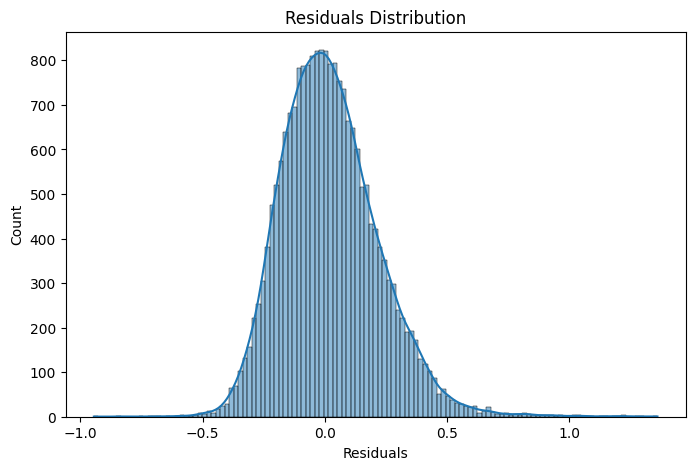

In [69]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

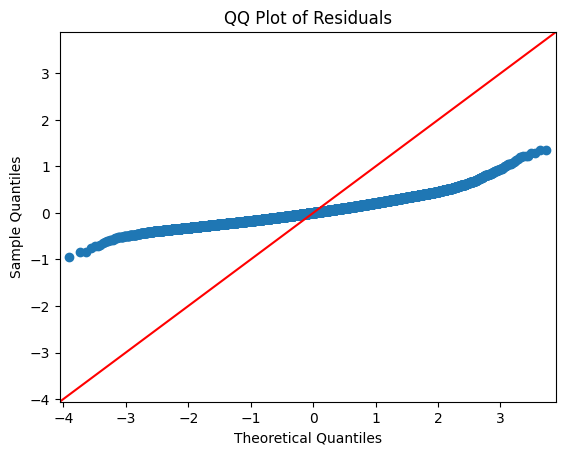

In [70]:
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

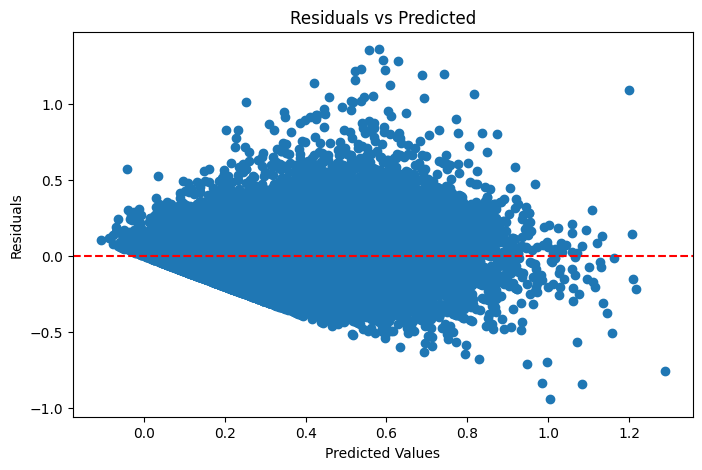

In [71]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

[Your inferences here:]



In [72]:
# We can see from the Residual distribution graph that the error is noramally distributed at the center

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [73]:
# Compare the scaled vs unscaled features used in the final model
comparison_df = pd.DataFrame({
    "Unscaled": coeffs_unscaled,
    "Scaled": coeffs_scaled
})

print("\nCoefficient Comparison:\n", comparison_df[~comparison_df['Scaled'].isna()].sort_values(by='Scaled', ascending=False))



Coefficient Comparison:
                            Unscaled    Scaled
distance                   0.460328  0.598262
total_outstanding_orders   0.381735  0.305694
num_distinct_items         0.642789  0.242784
total_items               -0.004406  0.094026
store_primary_category     0.004217  0.000236
min_item_price             0.000274  0.000082
market_id                 -0.569009 -0.010256
const                     33.713308 -0.022327
order_protocol            -0.754524 -0.029650


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [74]:
# Analyze the effect of a unit change in a feature, say 'total_items'

#From the final model we can observe that
# A 1 unit increase in distance increase the time taken by 0.6 units
# Similarly a 1 unit increase in total_outstanding_orders increase the time taken by 0.4 units

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>Yes I have one category column, marketid in my final model and it has negative coeeficient with the target variable.
Which means if you place order from market_id  5  it takes less time.




---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>It defined the test sample size of 20% and the remaining 80% will go for train set



---

Distance has the highest correlation with the target varible time_taken.
As the distance increase the time taken also increases and same can be seen in the chart

##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>I have followed these two approach.
1. Finding invalid data , by understanding column specification.
2. Removing outlier Using IQR formula



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final model result we can see total_outstanding_orders,distance ,num_distinct_items significantly increase the delivery time



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear Regression model is used to find relationship between a dependent variable and one or more independent variables. It provides valuable insights for prediction and data analysis.It used historical data for making predictions

There are two type of Linear Regression
1.Simple Linear Regression.
2.Multi linear Regression.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression:
In simple Linear Regression we have one target variable and one independent/predicator variable
And it use below quations.

Equation:
$y = \beta_0 + \beta_1 x + \epsilon$

Multiple Linear Regression:
In multiple Linear Regression we have one target variable and one and more independent/predicator variable
And it use below quations.

Equation:
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function measures how well the linear regression model's predictions match the actual data.

Quantifies the error between predicted outputs ($\hat{y}$ ) and actual outputs (𝑦).

Guides the training of the model and the goal is to minimize this error.

Ensures that the model learns the best possible coefficients



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting happens when a model learns too much from the training data including details that don’t matter (like noise or outliers).
As a result the model works great on training data but fails when tested on new data

Underfitting is the opposite of overfitting. It happens when a model is too simple to capture what’s going on in the data.
In this case, the model doesn’t work well on either the training or testing data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>In regression analysis, residuals refer to the differences between the observed and predicted values from the regression model. These residuals are crucial in evaluating the accuracy and appropriateness of the regression model.